In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report

In [7]:
df = pd.read_csv('cell_samples.csv')
df

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


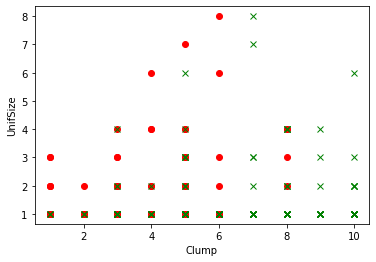

In [16]:
plt.plot(df['Clump'][df.Class == 2][:200], df['UnifSize'][df.Class == 2][:200], 'ro', label = 'Benign')
plt.plot(df['Clump'][df.Class == 4][:200], df['UnifSize'][df.Class == 2][:200], 'gx', label = 'Malignant')
plt.ylabel('UnifSize')
plt.xlabel('Clump')
plt.show()

In [21]:
df.dtypes 
df = df[pd.to_numeric(df['BareNuc'], errors = 'coerce').notnull()]

In [31]:
df['BareNuc'] = df['BareNuc'].astype('int')
df.shape

/home/rhithick/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


(683, 11)

In [32]:
X = df.iloc[:, 1:10].values
Y = df.iloc[:, 10].values

In [36]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 4)
x_train.shape, x_test.shape

((546, 9), (137, 9))

In [53]:
classifier = svm.SVC(kernel = 'linear', gamma = 'auto', C = 2)
classifier.fit(x_train, y_train)

SVC(C=2, gamma='auto', kernel='linear')

In [52]:
y_predict = classifier.predict(x_test)
cnt = 0
for i in range(len(y_test)):
    if y_predict[i] == y_test[i]:
        cnt += 1
print("Accuracy: " + str(cnt / len(y_test)))

Accuracy: 0.9635036496350365


In [57]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137

